In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set(style='darkgrid')

In [67]:
df=pd.read_csv('/U....Recommender-Systems/u.data',
              sep='\t', header=None)

In [68]:
df.head()

,0,1,2,3
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [69]:
columns_names={0:'user_id',1 :'item_id',2 :'rating', 3:'timestamp'}


In [70]:
df.rename(columns=columns_names, inplace=True)

In [71]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [72]:
movie_titles=pd.read_csv('/U....Recommender-Systems/Movie_Id_Titles')

In [73]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [74]:
df=pd.merge(df,movie_titles, on='item_id')

df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100003 entries, 0 to 100002
Data columns (total 5 columns):
user_id      100003 non-null int64
item_id      100003 non-null int64
rating       100003 non-null int64
timestamp    100003 non-null int64
title        100003 non-null object
dtypes: int64(4), object(1)
memory usage: 4.6+ MB


In [65]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head(15)

title
Marlene Dietrich: Shadow and Light (1996)            5.000
Prefontaine (1997)                                   5.000
Santa with Muscles (1996)                            5.000
Star Kid (1997)                                      5.000
Someone Else's America (1995)                        5.000
Entertaining Angels: The Dorothy Day Story (1996)    5.000
Saint of Fort Washington, The (1993)                 5.000
Great Day in Harlem, A (1994)                        5.000
They Made Me a Criminal (1939)                       5.000
Aiqing wansui (1994)                                 5.000
Pather Panchali (1955)                               4.625
Anna (1996)                                          4.500
Everest (1998)                                       4.500
Maya Lin: A Strong Clear Vision (1994)               4.500
Some Mother's Son (1996)                             4.500
Name: rating, dtype: float64

In [77]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head(15)

title
Star Wars (1977)                    584
Contact (1997)                      509
Fargo (1996)                        508
Return of the Jedi (1983)           507
Liar Liar (1997)                    485
English Patient, The (1996)         481
Scream (1996)                       478
Toy Story (1995)                    452
Air Force One (1997)                431
Independence Day (ID4) (1996)       429
Raiders of the Lost Ark (1981)      420
Godfather, The (1972)               413
Pulp Fiction (1994)                 394
Twelve Monkeys (1995)               392
Silence of the Lambs, The (1991)    390
Name: rating, dtype: int64

In [92]:
ratings= pd.DataFrame(df.groupby('title')['rating'].mean())

ratings.head(15)

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
2 Days in the Valley (1996),3.225806
"20,000 Leagues Under the Sea (1954)",3.500000
2001: A Space Odyssey (1968),3.969112
3 Ninjas: High Noon At Mega Mountain (1998),1.000000


In [93]:
ratings['num_of_ratings']=pd.DataFrame(df.groupby('title')['rating'].count())

ratings.head(15)

,rating,num_of_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
2 Days in the Valley (1996),3.225806,93
"20,000 Leagues Under the Sea (1954)",3.500000,72
2001: A Space Odyssey (1968),3.969112,259
3 Ninjas: High Noon At Mega Mountain (1998),1.000000,5


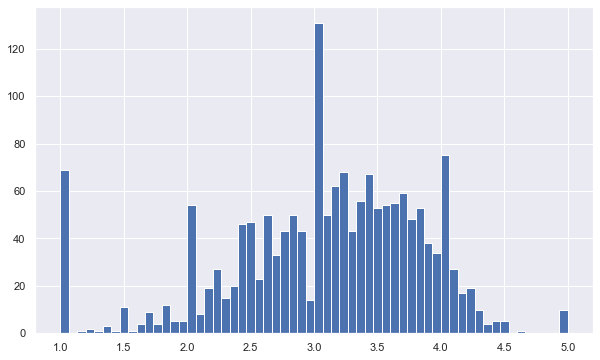

In [96]:
plt.figure(figsize=(10,6))
ratings.rating.hist(bins=60)

plt.show()


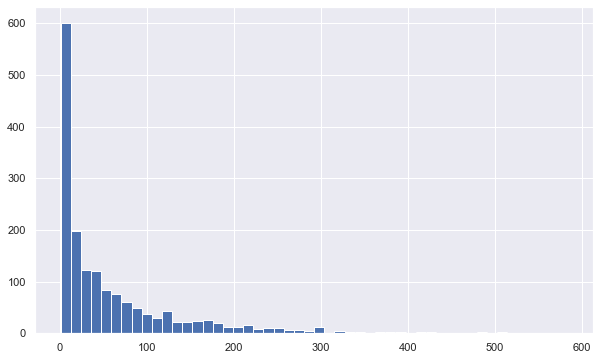

In [100]:
plt.figure(figsize=(10,6))

ratings['num_of_ratings'].hist(bins=50)

plt.show()

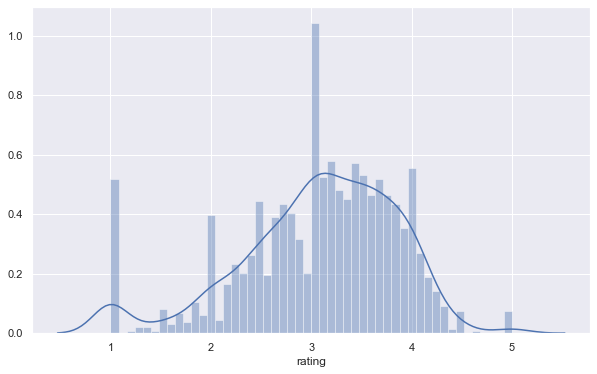

In [104]:
plt.figure(figsize=(10,6))
sns.distplot(ratings['rating'],bins=50)
plt.show()

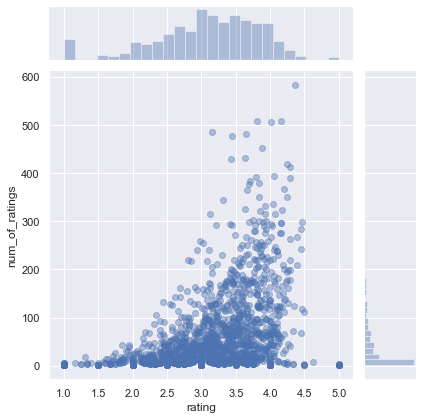

In [116]:

sns.jointplot(x='rating', y='num_of_ratings', data=ratings, alpha=0.4)
plt.show()

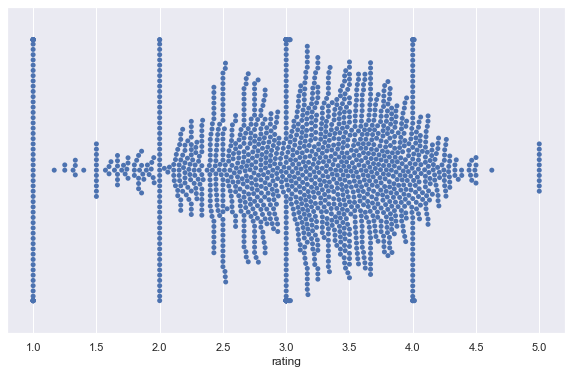

In [110]:
plt.figure(figsize=(10,6))
sns.swarmplot(ratings['rating'])
plt.show()

In [123]:
ratings.corr()

,rating,num_of_ratings
rating,1.000000,0.430989
num_of_ratings,0.430989,1.000000


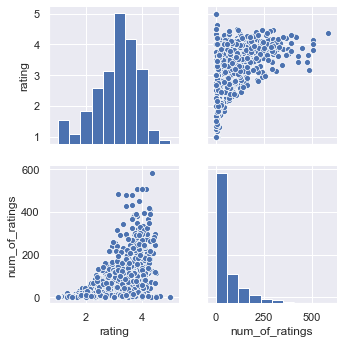

In [119]:
sns.pairplot(ratings)
plt.show()

In [124]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1664 entries, 'Til There Was You (1997) to Á köldum klaka (Cold Fever) (1994)
Data columns (total 2 columns):
rating            1664 non-null float64
num_of_ratings    1664 non-null int64
dtypes: float64(1), int64(1)
memory usage: 119.0+ KB


In [126]:
movie_matrix=df.pivot_table(index='user_id', columns='title',values='rating')
movie_matrix.head(15)

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
6,NaN,NaN,NaN,4.0,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,4.0,NaN,NaN,5.0,5.0,NaN,4.0,...,NaN,NaN,NaN,5.0,3.0,NaN,3.0,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
ratings.sort_values('num_of_ratings',ascending=False).head(20)

,rating,num_of_ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [128]:
ratings.head()

,rating,num_of_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [132]:
fargo_user_ratings=movie_matrix['Fargo (1996)']

toys_user_ratings=movie_matrix['Toy Story (1995)']

godfather_user_ratings=movie_matrix['Godfather, The (1972)']

In [133]:
godfather_user_ratings.head()

user_id
0    NaN
1    5.0
2    5.0
3    NaN
4    NaN
Name: Godfather, The (1972), dtype: float64

In [145]:
sim_to_godfather=movie_matrix.corrwith(godfather_user_ratings)

sim_to_toys=movie_matrix.corrwith(toys_user_ratings)

sim_to_fargo=movie_matrix.corrwith(fargo_user_ratings)

/Users/poyraz/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/poyraz/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [157]:
corr_godfather=pd.DataFrame(sim_to_godfather, columns=['Correlation'])
corr_godfather.dropna(inplace=True)
corr_godfather.sort_values('Correlation', ascending=False).head()

,Correlation
title,
Dark City (1998),1.0
8 Seconds (1994),1.0
Talking About Sex (1994),1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0
"Bye Bye, Love (1995)",1.0


In [158]:
corr_godfather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1353 entries, 'Til There Was You (1997) to unknown
Data columns (total 1 columns):
Correlation    1353 non-null float64
dtypes: float64(1)
memory usage: 21.1+ KB


In [147]:
corr_godfather=corr_godfather.join(ratings['num_of_ratings'])

corr_godfather.head()

,Correlation,num_of_ratings
title,,
'Til There Was You (1997),0.612372,9
1-900 (1994),-0.471405,5
101 Dalmatians (1996),0.084183,109
12 Angry Men (1957),0.034258,125
187 (1997),0.467335,41


In [148]:
corr_godfather[corr_godfather['num_of_ratings']>200].sort_values('Correlation', ascending=False).head(10)

,Correlation,num_of_ratings
title,,
"Godfather, The (1972)",1.000000,413
"Godfather: Part II, The (1974)",0.683862,209
GoodFellas (1990),0.421477,226
"People vs. Larry Flynt, The (1996)",0.393439,215
Apocalypse Now (1979),0.374378,221
Dead Man Walking (1995),0.360525,299
Psycho (1960),0.336903,239
Field of Dreams (1989),0.309903,212
2001: A Space Odyssey (1968),0.305717,259


In [153]:
corr_toys=pd.DataFrame(sim_to_toys, columns=['Correlation'])

corr_toys.dropna(inplace=True)

In [155]:
corr_toys=corr_toys.join(ratings['num_of_ratings'])

corr_toys.head()

,Correlation,num_of_ratings
title,,
'Til There Was You (1997),0.534522,9
101 Dalmatians (1996),0.232118,109
12 Angry Men (1957),0.334943,125
187 (1997),0.651857,41
2 Days in the Valley (1996),0.162728,93


In [156]:
corr_toys[corr_toys['num_of_ratings']>100].sort_values('Correlation', ascending=False).head(10)

,Correlation,num_of_ratings
title,,
Toy Story (1995),1.000000,452
"Craft, The (1996)",0.549100,104
Down Periscope (1996),0.457995,101
Miracle on 34th Street (1994),0.456291,101
G.I. Jane (1997),0.454756,175
Amistad (1997),0.449915,124
Beauty and the Beast (1991),0.442960,202
"Mask, The (1994)",0.432855,129
Cinderella (1950),0.428372,129


In [159]:
corr_fargo=pd.DataFrame(sim_to_fargo, columns=['Correlation'])
corr_fargo.dropna(inplace=True)

In [162]:
corr_fargo=corr_fargo.join(ratings['num_of_ratings'])

corr_fargo.head()

,Correlation,num_of_ratings
title,,
'Til There Was You (1997),0.100000,9
1-900 (1994),0.866025,5
101 Dalmatians (1996),-0.245368,109
12 Angry Men (1957),0.098676,125
187 (1997),0.142509,41


In [163]:
corr_fargo[corr_fargo['num_of_ratings']>150].sort_values('Correlation', ascending=False).head(10)

,Correlation,num_of_ratings
title,,
Fargo (1996),1.000000,508
Lone Star (1996),0.370915,187
Quiz Show (1994),0.355031,175
Lawrence of Arabia (1962),0.353408,173
"People vs. Larry Flynt, The (1996)",0.341784,215
Stand by Me (1986),0.332730,227
This Is Spinal Tap (1984),0.312781,191
Amadeus (1984),0.308669,276
2001: A Space Odyssey (1968),0.299882,259
